<a href="https://colab.research.google.com/github/enzoampil/phcovid/blob/master/sample/phcovid_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install phcovid

     |████████████████████████████████| 112kB 2.1MB/s 
     |████████████████████████████████| 13.1MB 306kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1


In [0]:
from phcovid import get_cases
from matplotlib import pyplot as plt
import numpy as np

# Get data

In [3]:
%%time
df = get_cases()

CPU times: user 15.7 s, sys: 191 ms, total: 15.9 s
Wall time: 21.2 s


In [4]:
df.head()

,case_no,age,sex,nationality,residence,travel_history,symptoms,confirmation_date,facility,latitude,longitude,status,epi_link,date,case_no_num,final_status_date,announcement_date,contacts,num_contacts,contacts_num
0,PH1,38,F,Chinese,CHINA,Yes (China); Wife of PH2,NaN,2020-01-30,San Lazaro Hospital,14.613754,120.980815,Recovered,,2020-01-29 16:00:00,1,2020-02-08,2020-01-30,[PH2],1,[2]
1,PH2,44,M,Chinese,CHINA,Yes (China); Husband of PH1,"Fever, Cough, Sore throat",2020-01-30,San Lazaro Hospital,14.613754,120.980815,Expired,,2020-01-29 16:00:00,2,2020-02-01,2020-02-02,[PH1],1,[1]
2,PH3,60,F,Chinese,CHINA,Yes (China),NaN,2020-01-30,ACE Medical Center,14.615867,120.980991,Recovered,,2020-01-29 16:00:00,3,2020-03-15,2020-02-05,[],0,[]
3,PH4,48,M,Filipino,"Taguig City, NCR, Fourth District",Yes (Japan),Fever,2020-03-05,University of the East Ramon Magsaysay Memoria...,14.607030,121.020581,Recovered,,2020-03-04 16:00:00,4,2020-03-19,2020-03-06,[],0,[]
4,PH5,62,M,Filipino,"Cainta, Rizal",Husband of PH6,Cough,2020-03-05,Research Institute for Tropical Medicine,14.409523,121.037122,Expired,,2020-03-04 16:00:00,5,2020-03-12,2020-03-06,[PH6],1,[6]


In [6]:
df.status.unique()

array(['Recovered', 'Expired', 'Admitted'], dtype=object)

In [7]:
df.shape

(2311, 20)

In [8]:
df.columns

Index(['case_no', 'age', 'sex', 'nationality', 'residence', 'travel_history',
       'symptoms', 'confirmation_date', 'facility', 'latitude', 'longitude',
       'status', 'epi_link', 'date', 'case_no_num', 'final_status_date',
       'announcement_date', 'contacts', 'num_contacts', 'contacts_num'],
      dtype='object')

# Save data as a csv

In [0]:
from google.colab import files

In [0]:
df = get_cases()
df.to_csv('phcovid_cases.csv', index=False)

In [0]:
files.download('phcovid_cases.csv')

# Plot cases over time

In [0]:
cases = df.groupby('announcement_date').agg({'case_no': 'count'})
cases.columns = ['new_cases']
cases['total_cases'] = cases.cumsum()
cases['log_total_cases'] = np.log10(cases.total_cases.values)
cases['log_new_cases'] = np.log10(cases.new_cases.values)

Text(0.5, 1.0, 'New cases vs total COVID-19 cases in PH')

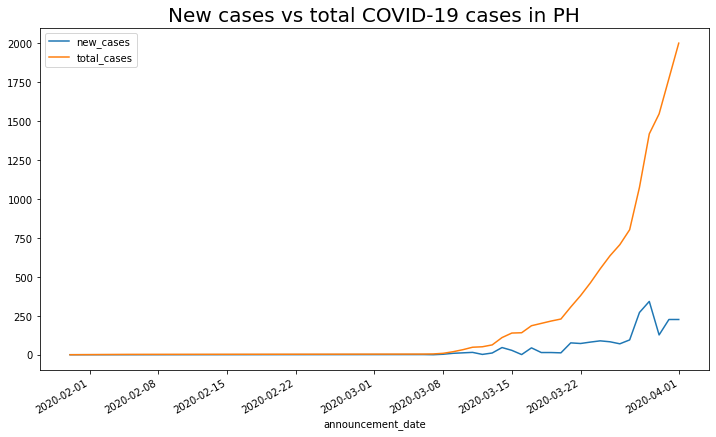

In [10]:
cases[['new_cases', 'total_cases']].plot(figsize=(12, 7))
plt.title("New cases vs total COVID-19 cases in PH", fontsize=20)

Text(0.5, 1.0, 'Log New Cases vs Log Total Cases PH')

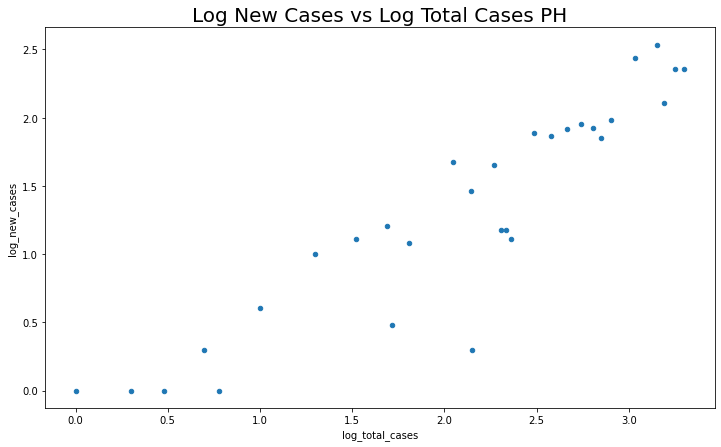

In [11]:
ax = cases[['log_new_cases', 'log_total_cases']].plot.scatter(1, 0, figsize=(12, 7))
plt.title("Log New Cases vs Log Total Cases PH", fontsize=20)

# Plot age distribution

Text(0.5, 1.0, 'Age Distribution of Confirmed Cases in PH (as of 2020-04-01)')

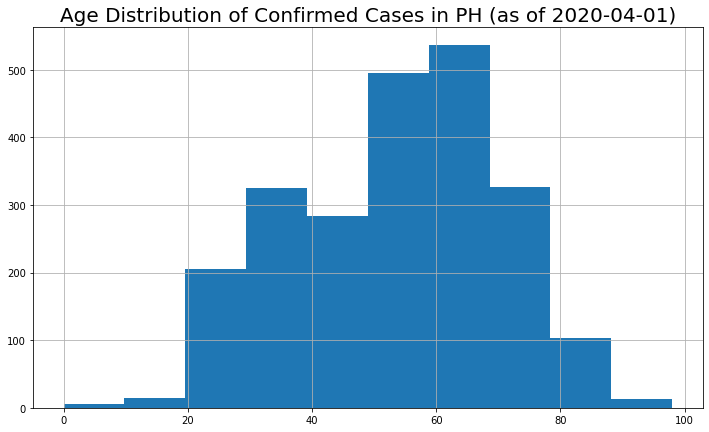

In [30]:
df.age[df.age != 'for_validation'].astype(int).hist(figsize=(12, 7))
last_announcement_date = df.announcement_date.max().date().strftime('%Y-%m-%d')
plt.title("Age Distribution of Confirmed Cases in PH (as of {})".format(last_announcement_date), fontsize=20)

'2020-04-01'